# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [2]:
%pip install iso3166

Note: you may need to restart the kernel to use updated packages.


### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [3]:
%pip install --upgrade plotly

Note: you may need to restart the kernel to use updated packages.


### Import Statements

In [351]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [352]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [353]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [354]:
df_data

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
...,...,...,...,...,...,...,...,...,...
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


In [355]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Organisation    4324 non-null   object
 3   Location        4324 non-null   object
 4   Date            4324 non-null   object
 5   Detail          4324 non-null   object
 6   Rocket_Status   4324 non-null   object
 7   Price           964 non-null    object
 8   Mission_Status  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


In [356]:
df_data['Price'] = df_data['Price'].str.replace(",","")
df_data['Price'] = pd.to_numeric(df_data['Price'])

In [357]:
df_data['Date'] = pd.to_datetime(df_data['Date'], format='mixed')
df_data['Date'] = pd.to_datetime(df_data['Date'], utc=True).dt.tz_localize(None)

C:\Users\akhil\AppData\Local\Temp\ipykernel_14160\1967490487.py:1: FutureWarning:

In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`



In [358]:
df_data

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success
...,...,...,...,...,...,...,...,...,...
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05 07:33:00,Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 03:48:00,Juno I | Explorer 1,StatusRetired,NaN,Success
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06 16:44:00,Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [359]:
df_data.isna().values.any()

True

In [360]:
df_data.isna().sum()

Unnamed: 0.1         0
Unnamed: 0           0
Organisation         0
Location             0
Date                 0
Detail               0
Rocket_Status        0
Price             3360
Mission_Status       0
dtype: int64

In [361]:
df_data.duplicated().values.any()

False

In [362]:
df_data.drop_duplicates(inplace=True)

In [363]:
df_data.drop(columns=['Unnamed: 0.1','Unnamed: 0'], axis=1, inplace=True)

In [364]:
df_data.duplicated().values.any()

True

In [365]:
df_data.drop_duplicates(inplace=True)

In [366]:
df_data

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success
...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05 07:33:00,Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 03:48:00,Juno I | Explorer 1,StatusRetired,NaN,Success
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06 16:44:00,Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


## Descriptive Statistics

In [367]:

df_data.describe()

,Date,Price
count,4323,963.00
mean,1987-11-26 22:43:25.981956928,153.92
min,1957-10-04 19:28:00,5.30
25%,1972-04-19 02:57:00,40.00
50%,1984-12-14 20:40:00,62.00
75%,2002-09-08 07:32:00,164.00
max,2020-08-07 05:12:00,"5,000.00"
std,NaN,288.57


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [368]:
launches_per_organisation = df_data['Organisation'].value_counts().to_frame().reset_index()

In [369]:
launches_per_organisation

,Organisation,count
0,RVSN USSR,1777
1,Arianespace,279
2,General Dynamics,251
3,CASC,250
4,NASA,203
5,VKS RF,201
6,US Air Force,161
7,ULA,140
8,Boeing,136
9,Martin Marietta,114


In [370]:
plt.figure(figsize=(16,8), dpi=200)

Bar = px.bar(data_frame=launches_per_organisation,
             x='count',
             y='Organisation',
             orientation='h',
             color='count',
             color_continuous_scale='Plasma',
            )
Bar.show()

<Figure size 3200x1600 with 0 Axes>

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [371]:
Rocket_status = df_data['Rocket_Status'].value_counts().to_frame().reset_index()

In [372]:
Rocket_status

,Rocket_Status,count
0,StatusRetired,3534
1,StatusActive,789


In [373]:
plt.figure(figsize=(16,8), dpi=200)

Bar = px.bar(data_frame=Rocket_status,
             x='Rocket_Status',
             y='count',
             color='count',
             color_continuous_scale='Plasma',
            )
Bar.show()

<Figure size 3200x1600 with 0 Axes>

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [374]:
Mission_status = df_data['Mission_Status'].value_counts().to_frame().reset_index()

In [375]:
Mission_status

,Mission_Status,count
0,Success,3878
1,Failure,339
2,Partial Failure,102
3,Prelaunch Failure,4


In [376]:
plt.figure(figsize=(16,8), dpi=200)

Bar = px.bar(data_frame=Mission_status,
             x='count',
             y='Mission_Status',
             orientation='h',
             color='count',
             color_continuous_scale='Plasma',
            )
Bar.show()

<Figure size 3200x1600 with 0 Axes>

# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

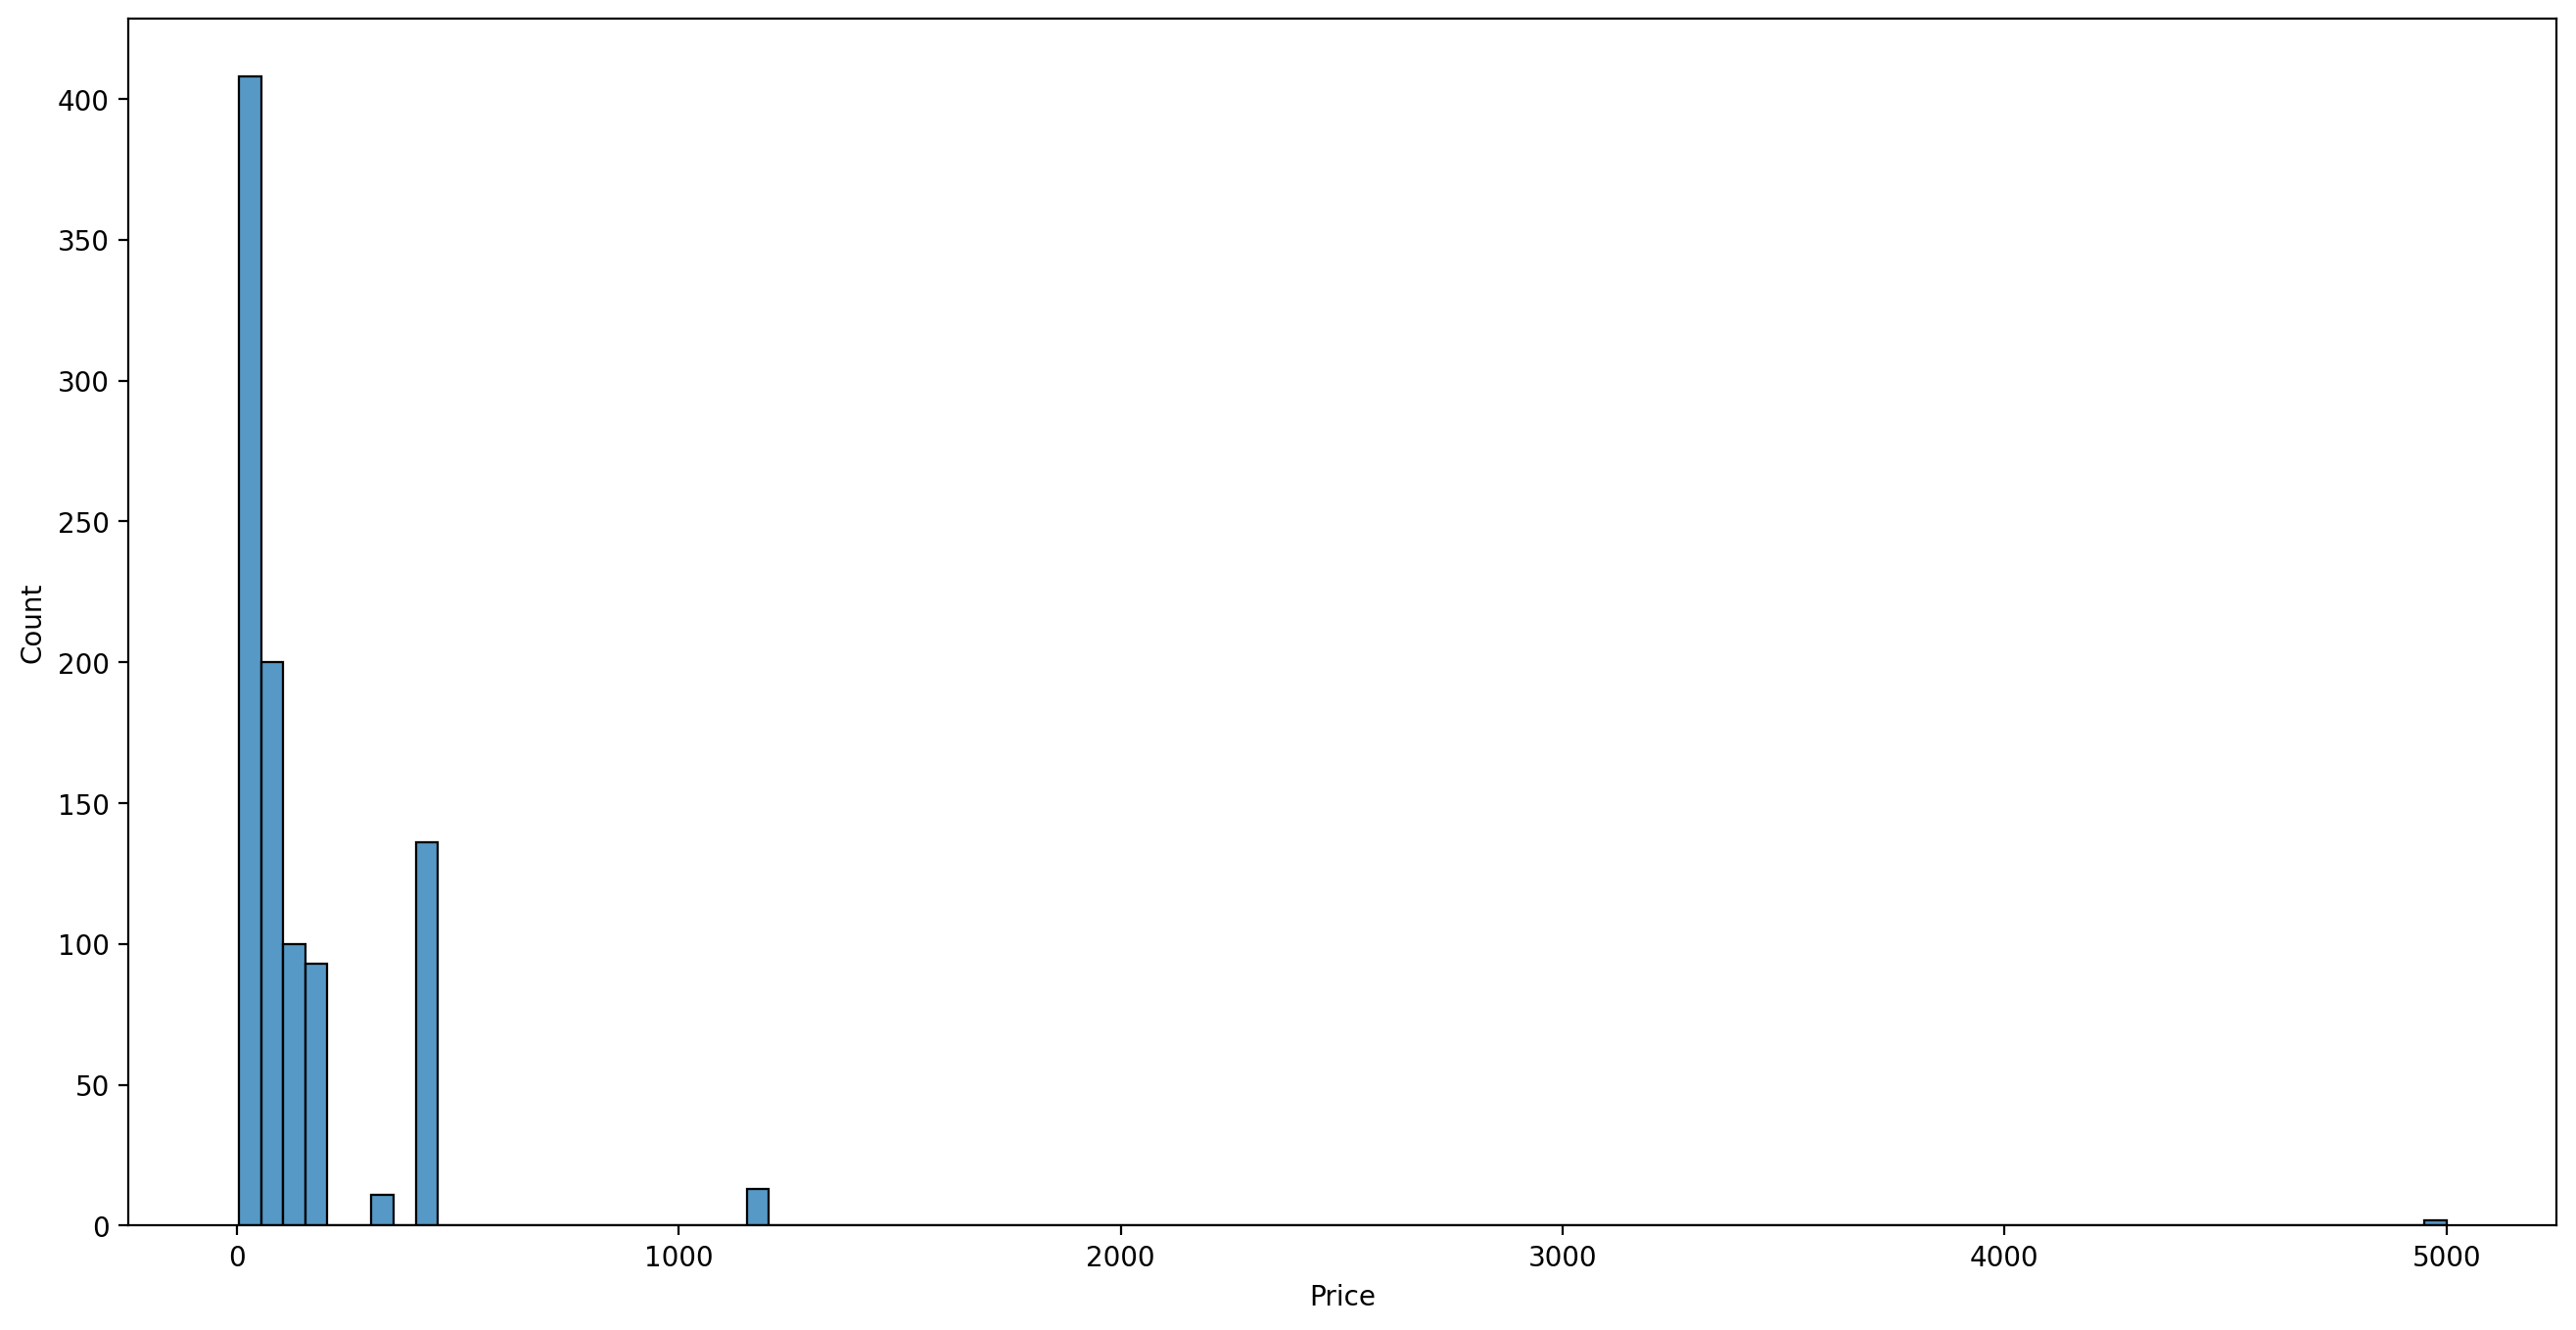

In [377]:
plt.figure(figsize=(16,8), dpi=200)

sns.histplot(data=df_data,
             x='Price',
             bins=100,
            )
plt.show()

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [378]:
df_data['ISO_CODE'] = df_data['Location'].str.split(", ").str[-1]

In [379]:
country_name_mapping = {
    'Russia': 'Russian Federation',
    'New Mexico': 'USA',
    'Yellow Sea': 'China',
    'Shahrud Missile Test Site': 'Iran, Islamic Republic of',
    'Pacific Missile Range Facility': 'USA',
    'Barents Sea': 'Russian Federation',
    'Gran Canaria': 'USA',
    'Iran' : 'Iran, Islamic Republic of',
    'South Korea' : 'Korea, Republic of',
    'North Korea' : 'Korea, Democratic People\'s Republic of',
    'Pacific Ocean' : 'Kiribati'
}
df_data['ISO_CODE'] = df_data['ISO_CODE'].replace(country_name_mapping)

In [380]:
df_data['ISO_CODE'] = df_data['ISO_CODE'].apply(lambda x: countries.get(x).alpha3)

In [381]:
df_data['ISO_CODE']

0       USA
1       CHN
2       USA
3       KAZ
4       USA
       ... 
4319    USA
4320    USA
4321    USA
4322    KAZ
4323    KAZ
Name: ISO_CODE, Length: 4323, dtype: object

In [382]:
launches_per_country = df_data['ISO_CODE'].value_counts().to_frame().reset_index()

In [383]:
launches_per_country

,ISO_CODE,count
0,RUS,1398
1,USA,1351
2,KAZ,701
3,FRA,303
4,CHN,268
5,JPN,126
6,IND,76
7,KIR,36
8,IRN,14
9,NZL,13


In [384]:
plt.figure(figsize=(16,8), dpi=200)

map = px.choropleth(launches_per_country,
                    locations = launches_per_country['ISO_CODE'],
                    color = launches_per_country['count'],
                    hover_name = launches_per_country['ISO_CODE'],
                    color_continuous_scale=px.colors.sequential.matter,
                    title = "Number Of Launches Per Country"
                   )


map.show()

<Figure size 3200x1600 with 0 Axes>

# Use a Choropleth Map to Show the Number of Failures by Country


In [385]:
mission_failures = df_data.query("Mission_Status == 'Failure'")['ISO_CODE'].value_counts().to_frame().reset_index()

In [386]:
mission_failures

,ISO_CODE,count
0,USA,129
1,KAZ,72
2,RUS,63
3,CHN,19
4,FRA,13
5,JPN,10
6,IRN,8
7,IND,8
8,KIR,3
9,PRK,3


In [387]:
plt.figure(figsize=(16,8), dpi=200)


map = px.choropleth(mission_failures,
                    locations = mission_failures['ISO_CODE'],
                    color = mission_failures['count'],
                    hover_name = mission_failures['ISO_CODE'],
                    color_continuous_scale=px.colors.sequential.matter,
                    title = "Mission Failures"
                   )


map.show()

<Figure size 3200x1600 with 0 Axes>

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [388]:
ms_per_org_per_country = df_data.groupby(['ISO_CODE', 'Organisation', 'Mission_Status'])['Detail'].agg(['count']).reset_index()

In [389]:
ms_per_org_per_country

,ISO_CODE,Organisation,Mission_Status,count
0,AUS,AMBA,Success,1
1,AUS,CECLES,Failure,2
2,AUS,CECLES,Success,1
3,AUS,RAE,Failure,1
4,AUS,RAE,Success,1
...,...,...,...,...
127,USA,US Air Force,Success,129
128,USA,US Navy,Failure,14
129,USA,US Navy,Partial Failure,1
130,USA,US Navy,Success,2


In [390]:
plt.figure(figsize=(16,8), dpi=200)

burst = px.sunburst(ms_per_org_per_country, 
                    path=['ISO_CODE', 'Organisation', 'Mission_Status'], 
                    values='count',
                    title='Sunburst of Countries, Organisation and Mission Status',
                   )
 
burst.show()

<Figure size 3200x1600 with 0 Axes>

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [392]:
amount_spent_per_organisation = df_data[['Organisation','Price']].dropna()

In [393]:
amount_spent_per_organisation = df_data.groupby('Organisation')['Price'].agg(['sum']).reset_index()


In [394]:
amount_spent_per_organisation

,Organisation,sum
0,AEB,0.00
1,AMBA,0.00
2,ASI,0.00
3,Arianespace,"16,345.00"
4,Arm??e de l'Air,0.00
5,Blue Origin,0.00
6,Boeing,"1,241.00"
7,CASC,"6,310.51"
8,CASIC,0.00
9,CECLES,0.00


In [395]:
plt.figure(figsize=(16,8), dpi=200)

Bar = px.bar(data_frame=amount_spent_per_organisation,
             x='sum',
             y='Organisation',
             orientation='h',
             color='sum',
             color_continuous_scale='Agsunset',
            )
Bar.show()

<Figure size 3200x1600 with 0 Axes>

# Analyse the Amount of Money Spent by Organisation per Launch

In [565]:
df_money_spent_by_org = df_data.dropna()
df_money_spent_by_org = df_money_spent_by_org.groupby('Organisation')['Price'].agg(['sum']).reset_index()
df_money_spent_by_org_per_launch = pd.merge(df_money_spent_by_org, launches_per_organisation, on='Organisation')

In [566]:
df_money_spent_by_org_per_launch['Price Per Launch'] = df_money_spent_by_org_per_launch['sum']/df_money_spent_by_org_per_launch['count']
df_money_spent_by_org_per_launch

,Organisation,sum,count,Price Per Launch
0,Arianespace,"16,345.00",279,58.58
1,Boeing,"1,241.00",136,9.12
2,CASC,"6,310.51",250,25.24
3,EER,20.00,1,20.00
4,ESA,37.00,13,2.85
5,Eurockot,543.40,13,41.80
6,ExPace,28.30,10,2.83
7,ILS,"1,320.00",46,28.70
8,ISRO,"2,177.00",76,28.64
9,JAXA,168.00,7,24.00


In [571]:
plt.figure(figsize=(16,8), dpi=200)

fig = px.bar(data_frame= df_money_spent_by_org_per_launch,
             x= df_money_spent_by_org_per_launch["Organisation"],
             y=df_money_spent_by_org_per_launch["Price Per Launch"],
             color='Organisation')

fig.update_layout(
    xaxis_title='Organisation',
    yaxis_title='Price Per Launch'
)

fig.show()

<Figure size 3200x1600 with 0 Axes>

# Chart the Number of Launches per Year

In [396]:
launches_per_year = df_data['Date'].dt.year.value_counts().to_frame().reset_index().sort_values('Date', ascending=True)

In [397]:
launches_per_year

,Date,count
63,1957,3
61,1958,28
62,1959,20
57,1960,39
42,1961,52
...,...,...
16,2016,90
15,2017,92
1,2018,117
5,2019,109


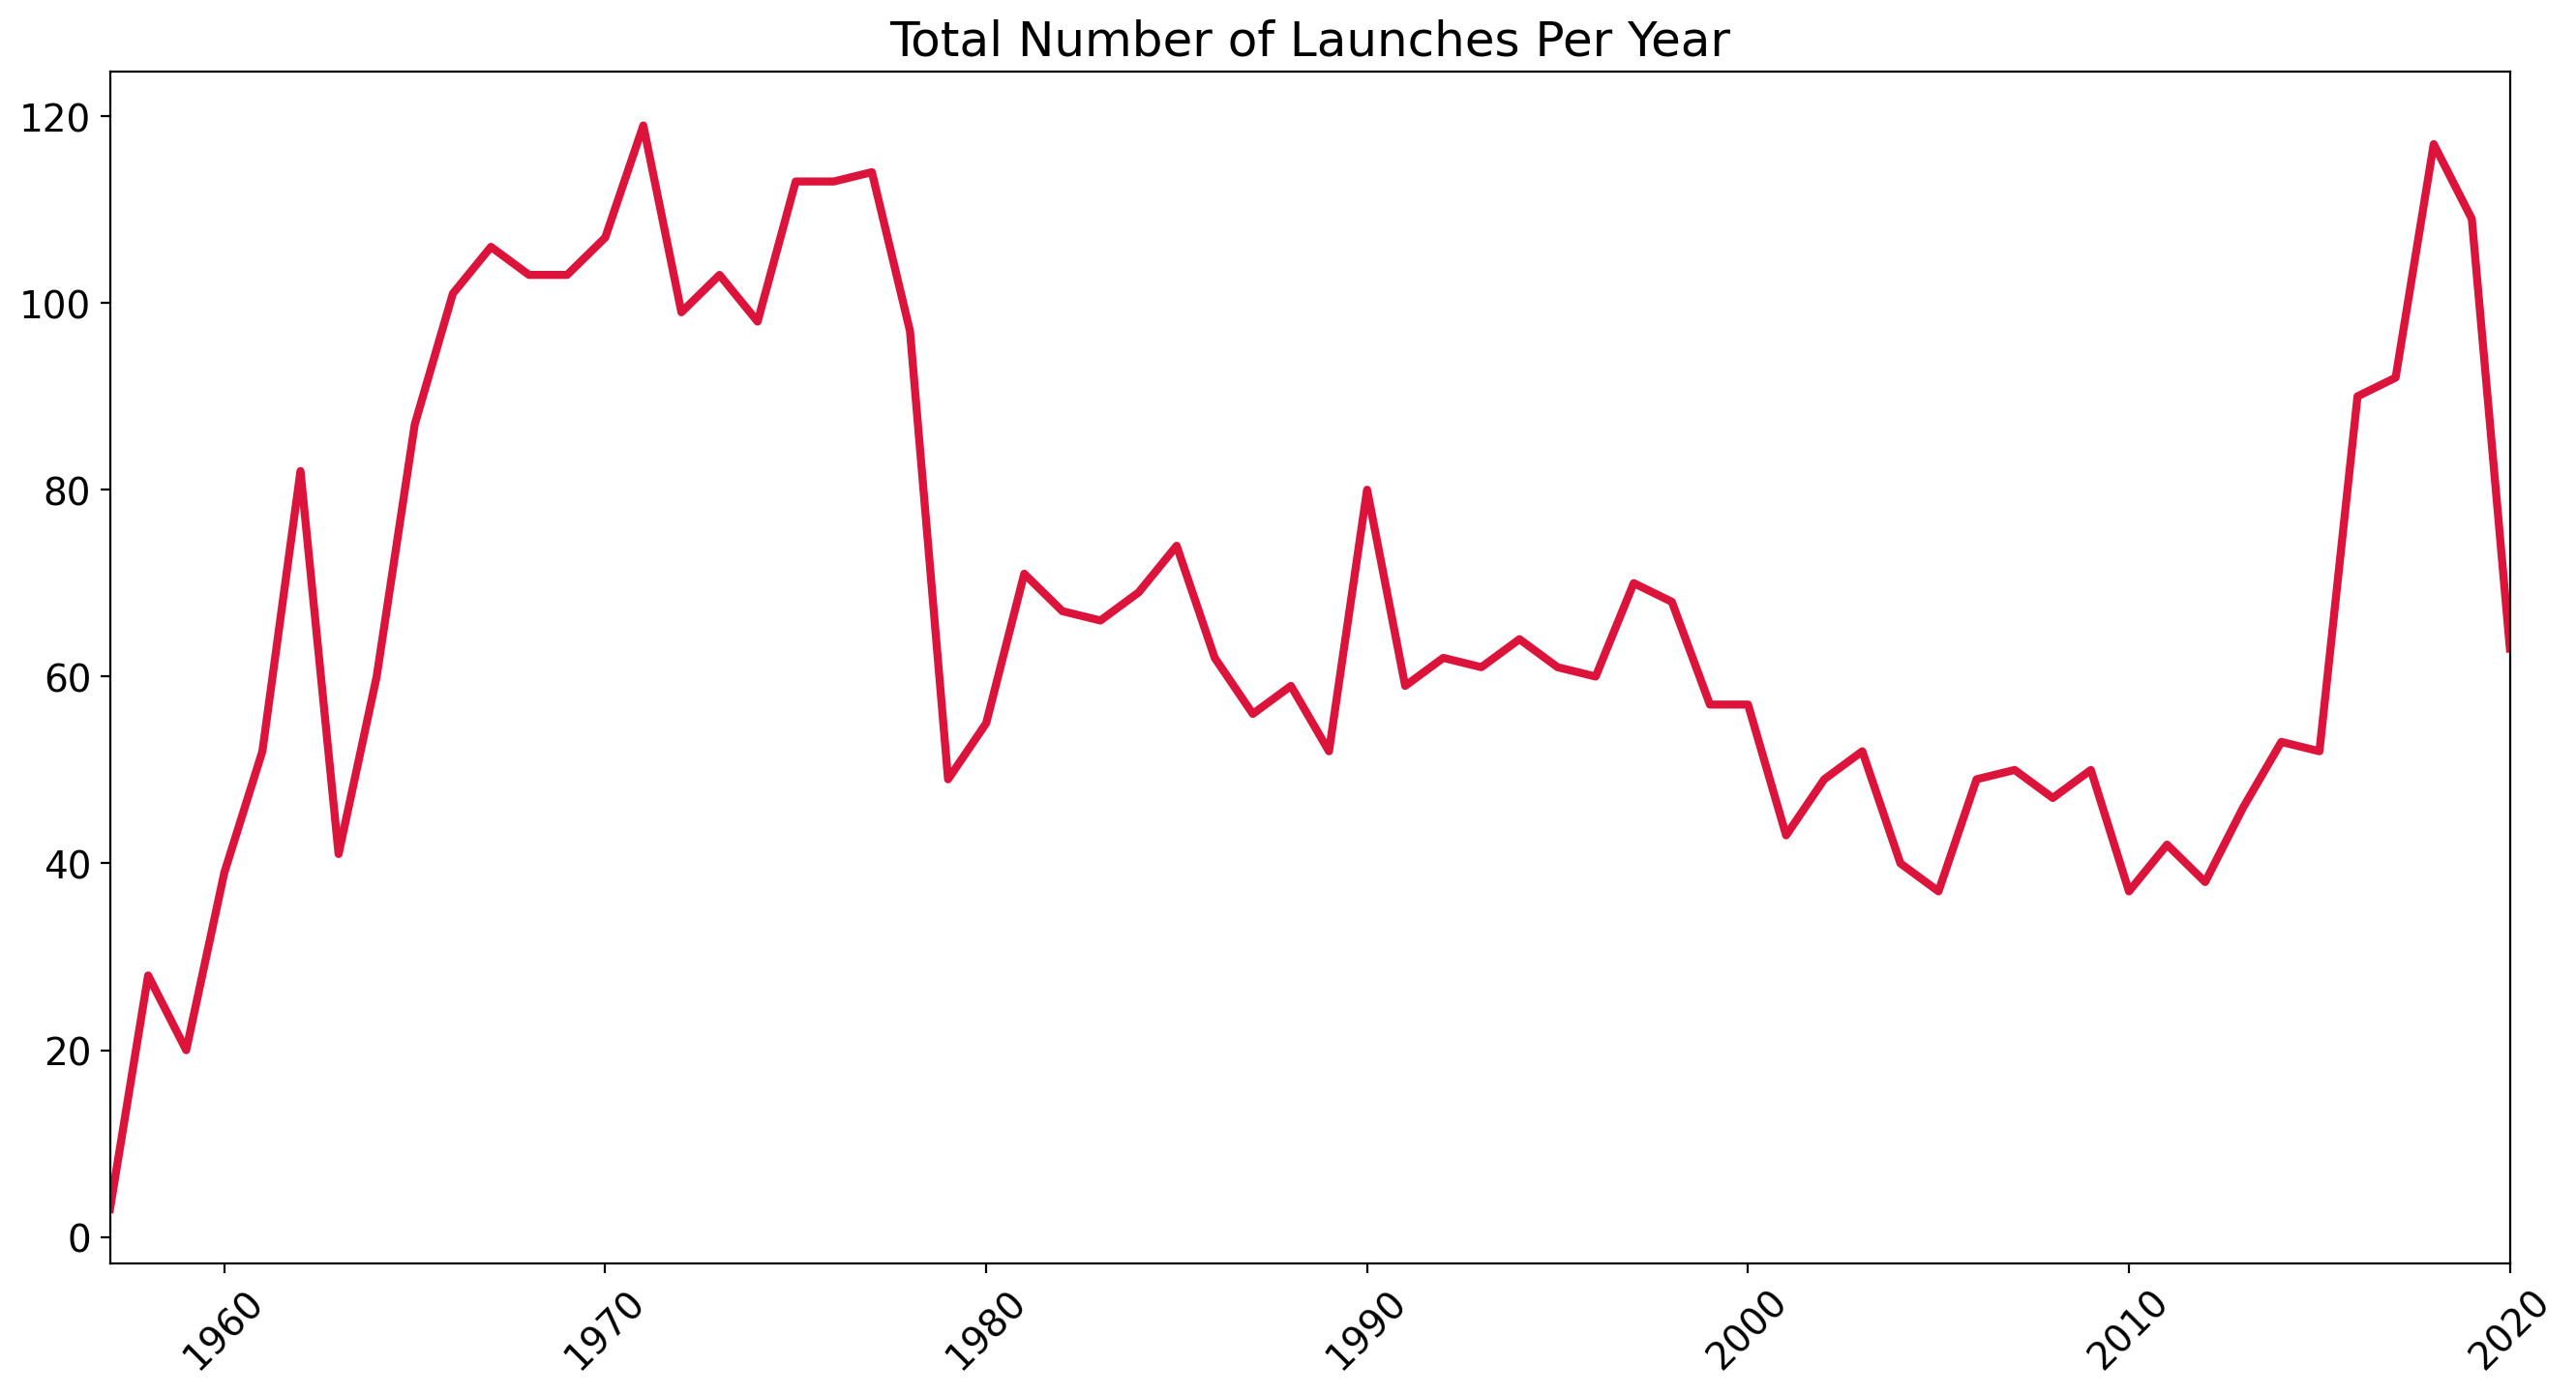

In [398]:
plt.figure(figsize=(16,8), dpi=200)


plt.title('Total Number of Launches Per Year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)

plt.plot(launches_per_year['Date'], launches_per_year['count'], linewidth = 3, c = 'crimson')
plt.xlim(launches_per_year['Date'].min(), launches_per_year['Date'].max())
plt.show()


# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [399]:
df_month_on_month = df_data['Date'].dt.strftime('%Y-%m').value_counts().reset_index().sort_values("Date", ascending=True)
df_month_on_month["Date"] = pd.to_datetime(df_month_on_month['Date'], format='%Y-%m')

In [400]:
df_month_on_month

,Date,count
746,1957-10-01,1
725,1957-11-01,1
724,1957-12-01,1
664,1958-02-01,2
573,1958-03-01,3
...,...,...
362,2020-04-01,5
131,2020-05-01,9
195,2020-06-01,7
12,2020-07-01,14


In [401]:
rolling_df = df_month_on_month.set_index('Date')
rolling_df = rolling_df.rolling(window=6).mean()

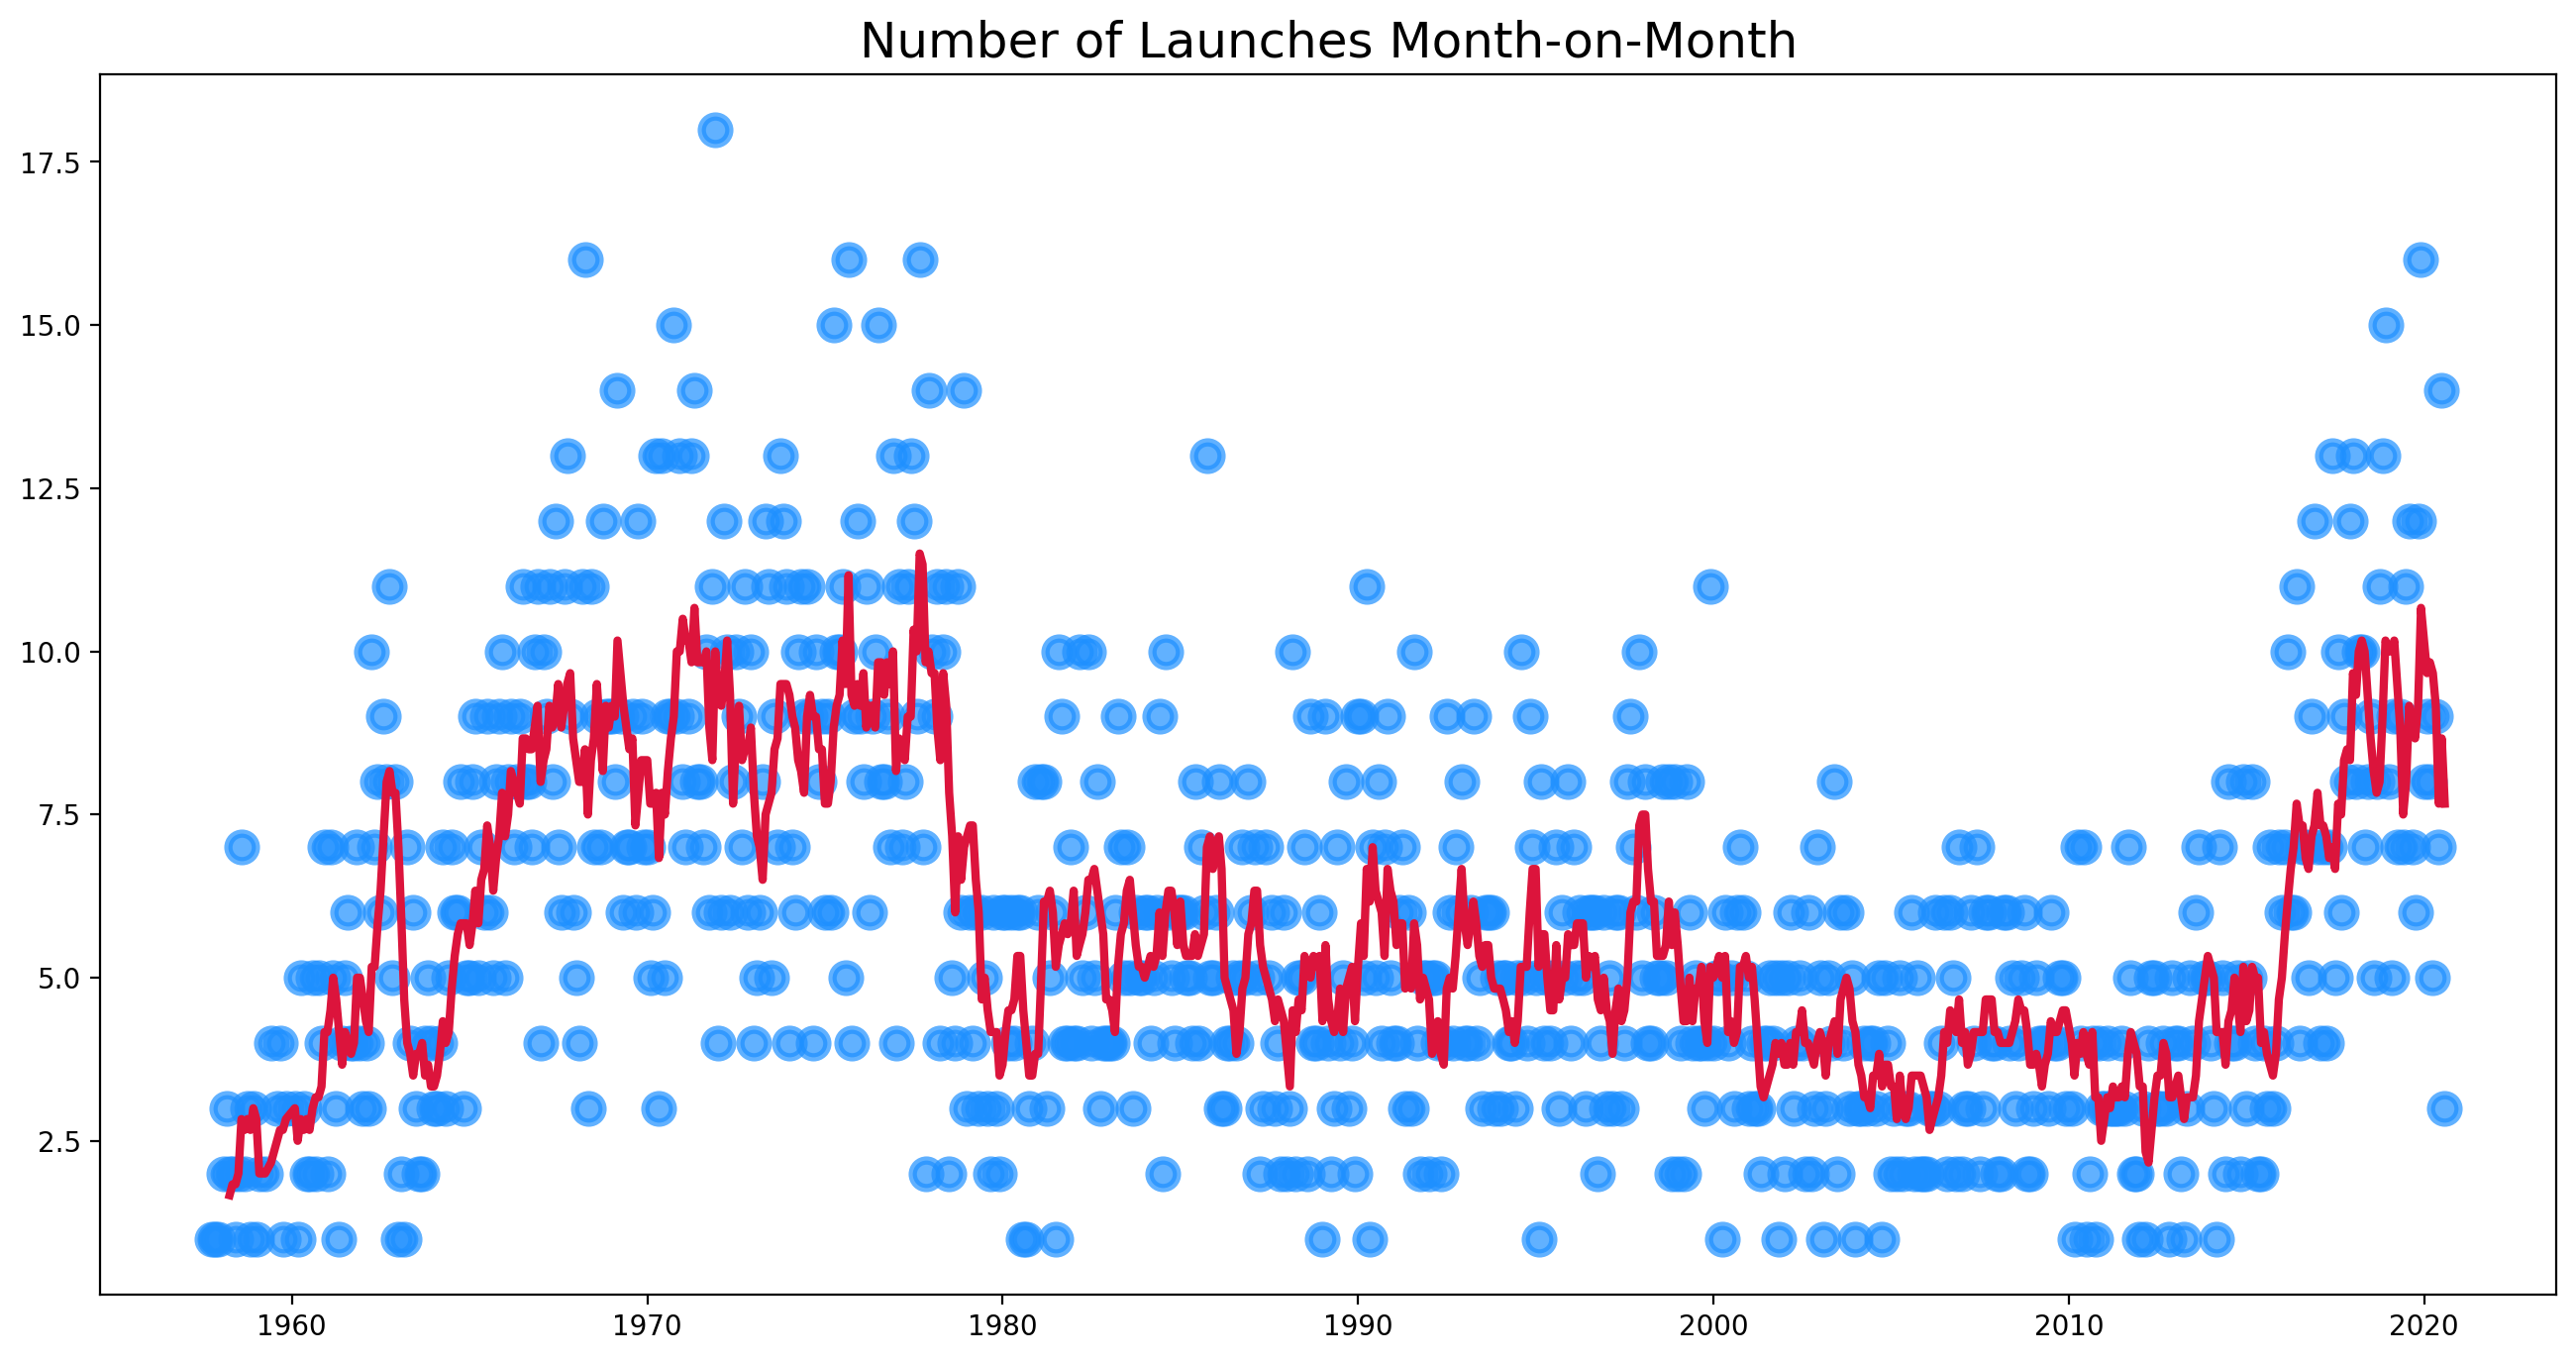

In [402]:
plt.figure(figsize=(16,8), dpi=200)
plt.title('Number of Launches Month-on-Month', fontsize=18)

ax1 = plt.gca()

ax1.scatter(df_month_on_month['Date'], df_month_on_month['count'], linewidth=3, c='dodgerblue',alpha=0.7,
           s=100,)
ax1.plot(df_month_on_month['Date'], rolling_df.values, linewidth=3, c='crimson')

plt.show()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [403]:
launches_per_month = df_data['Date'].dt.month.value_counts().to_frame().reset_index().sort_values('Date')

In [404]:
launches_per_month

,Date,count
11,1,268
8,2,336
6,3,353
2,4,383
10,5,326
1,6,402
7,7,351
4,8,373
5,9,365
3,10,381


In [405]:
print(f"The month of December seems to be the best for space missions with {launches_per_month['count'].max()} launches")

The month of December seems to be the best for space missions with 450 launches


# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [425]:
avg_price_of_rcl_per_year = df_data.dropna()
avg_price_of_rcl_per_year = avg_price_of_rcl_per_year.groupby(avg_price_of_rcl_per_year['Date'].dt.year)['Price'].mean().to_frame().reset_index()

In [426]:
avg_price_of_rcl_per_year

,Date,Price
0,1964,63.23
1,1965,63.23
2,1966,59.00
3,1967,196.62
4,1968,279.20
5,1969,609.50
6,1970,"1,160.00"
7,1971,"1,160.00"
8,1972,"1,160.00"
9,1973,"1,160.00"


In [427]:
plt.figure(figsize=(16,8), dpi=200)

line = px.line(avg_price_of_rcl_per_year,
                  x='Date',
                  y='Price',
                  )

line.update_layout(xaxis_title='Year',
                   yaxis_title='Number of Launches',
                   title = 'Number of Launches Month-on-Month')



line.show()

<Figure size 3200x1600 with 0 Axes>

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [428]:
launches_per_year_per_organisation = df_data[['Organisation','Date']].groupby(['Organisation',df_data['Date'].dt.year])['Organisation'].agg(['count']).reset_index()

In [429]:
launches_per_year_per_organisation

,Organisation,Date,count
0,AEB,1997,1
1,AEB,1999,1
2,AEB,2003,1
3,AMBA,1958,7
4,AMBA,1967,1
...,...,...,...
658,VKS RF,2020,3
659,Virgin Orbit,2020,1
660,Yuzhmash,1969,1
661,Yuzhmash,1991,1


In [430]:
top_10 = launches_per_year_per_organisation.groupby("Organisation").agg({"count" : pd.Series.count}).sort_values("count", ascending=False).reset_index().head(10)

In [431]:
top_10

,Organisation,count
0,CASC,47
1,NASA,46
2,MHI,42
3,RVSN USSR,39
4,Arianespace,37
5,General Dynamics,37
6,ISRO,31
7,Martin Marietta,30
8,Northrop,29
9,VKS RF,29


In [432]:
top_10_launches_per_year_per_organisation = pd.merge(launches_per_year_per_organisation, top_10,  on='Organisation')

In [433]:
top_10_launches_per_year_per_organisation.drop('count_y', axis=1, inplace=True)


In [435]:
top_10_launches_per_year_per_organisation.rename(columns={'count_x':'Total_launches'},inplace=True)

In [436]:
top_10_launches_per_year_per_organisation

,Organisation,Date,Total_launches
0,Arianespace,1984,3
1,Arianespace,1985,4
2,Arianespace,1986,3
3,Arianespace,1987,2
4,Arianespace,1988,6
...,...,...,...
362,VKS RF,2016,4
363,VKS RF,2017,6
364,VKS RF,2018,5
365,VKS RF,2019,8


In [437]:
plt.figure(figsize=(16,8), dpi=200)

line = px.line(top_10_launches_per_year_per_organisation,
                  x='Date',
                  y='Total_launches',
                  color='Organisation',
                  hover_name = 'Organisation'
                  )

line.update_layout(xaxis_title='Year',
                   yaxis_title='Number of Launches',
                   title = 'Number of Launches Month-on-Month')



line.show()

<Figure size 3200x1600 with 0 Axes>

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [438]:
df_data["ISO_CODE"].unique()

array(['USA', 'CHN', 'KAZ', 'JPN', 'ISR', 'NZL', 'RUS', 'IRN', 'FRA',
       'IND', 'PRK', 'KIR', 'KOR', 'BRA', 'KEN', 'AUS'], dtype=object)

In [439]:
df_USA = df_data.query("ISO_CODE == 'USA' and Date < '1992-01-01 00:10:00'").sort_values("Date", ascending=True)

df_USA

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,ISO_CODE
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06 16:44:00,Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 03:48:00,Juno I | Explorer 1,StatusRetired,NaN,Success,USA
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05 07:33:00,Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA
4318,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-03-05 18:27:00,Juno I | Explorer 2,StatusRetired,NaN,Failure,USA
4317,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-03-17 12:15:00,Vanguard | Vanguard 1,StatusRetired,NaN,Success,USA
...,...,...,...,...,...,...,...,...
1732,NASA,"LC-39A, Kennedy Space Center, Florida, USA",1991-09-12 23:11:00,Space Shuttle Discovery | STS-48,StatusRetired,450.00,Success,USA
1726,Martin Marietta,"SLC-4E, Vandenberg AFB, California, USA",1991-11-08 07:07:00,Titan IV(403)A | SLDCOM & NOSS 3x,StatusRetired,NaN,Success,USA
1724,NASA,"LC-39A, Kennedy Space Center, Florida, USA",1991-11-24 23:44:00,Space Shuttle Atlantis | STS-44,StatusRetired,450.00,Success,USA
1722,General Dynamics,"SLC-3W, Vandenberg AFB, California, USA",1991-11-28 13:23:00,Atlas-E/F Star-37S-ISS | DMSP F-11,StatusRetired,NaN,Success,USA


In [440]:
df_USSR = df_data.query("(ISO_CODE == 'RUS' or ISO_CODE == 'KAZ') and Date < '1992-01-01 00:10:00'").sort_values("Date", ascending=True)
df_USSR["ISO_CODE"] = "SUN"

df_USSR

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,ISO_CODE
4323,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-10-04 19:28:00,Sputnik 8K71PS | Sputnik-1,StatusRetired,NaN,Success,SUN
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,SUN
4315,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1958-04-27 09:01:00,Sputnik 8A91 | Sputnik-3 #1,StatusRetired,NaN,Failure,SUN
4313,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1958-05-15 07:12:00,Sputnik 8A91 | Sputnik-3 #2,StatusRetired,NaN,Success,SUN
4301,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1958-09-23 07:40:00,Vostok | E-1 n†­1 (Luna-1),StatusRetired,NaN,Failure,SUN
...,...,...,...,...,...,...,...,...
1728,RVSN USSR,"Site 132/1, Plesetsk Cosmodrome, Russia",1991-10-10 14:00:00,Cosmos-3M (11K65M) | Cosmos 2164,StatusRetired,NaN,Success,SUN
1725,RVSN USSR,"Site 32/1, Plesetsk Cosmodrome, Russia",1991-11-12 20:09:00,Tsyklon-3 | Cosmos 2165 to 2170,StatusRetired,NaN,Success,SUN
1723,RVSN USSR,"Site 133/3, Plesetsk Cosmodrome, Russia",1991-11-27 03:30:00,Cosmos-3M (11K65M) | Cosmos 2173,StatusRetired,NaN,Success,SUN
1719,Yuzhmash,"Site 32/2, Plesetsk Cosmodrome, Russia",1991-12-18 03:54:00,Tsyklon-3 | Intercosmos 25 & Magion 3,StatusRetired,NaN,Success,SUN


In [441]:
df_cold_war = pd.concat([df_USA, df_USSR]).sort_values("Date", ascending=True)

df_cold_war

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,ISO_CODE
4323,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-10-04 19:28:00,Sputnik 8K71PS | Sputnik-1,StatusRetired,NaN,Success,SUN
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,SUN
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06 16:44:00,Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 03:48:00,Juno I | Explorer 1,StatusRetired,NaN,Success,USA
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05 07:33:00,Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA
...,...,...,...,...,...,...,...,...
1723,RVSN USSR,"Site 133/3, Plesetsk Cosmodrome, Russia",1991-11-27 03:30:00,Cosmos-3M (11K65M) | Cosmos 2173,StatusRetired,NaN,Success,SUN
1722,General Dynamics,"SLC-3W, Vandenberg AFB, California, USA",1991-11-28 13:23:00,Atlas-E/F Star-37S-ISS | DMSP F-11,StatusRetired,NaN,Success,USA
1721,General Dynamics,"SLC-36B, Cape Canaveral AFS, Florida, USA",1991-12-07 22:47:00,Atlas II | Eutelsat 2F3,StatusRetired,NaN,Success,USA
1719,Yuzhmash,"Site 32/2, Plesetsk Cosmodrome, Russia",1991-12-18 03:54:00,Tsyklon-3 | Intercosmos 25 & Magion 3,StatusRetired,NaN,Success,SUN


## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA
Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches.

In [443]:
cold_war_no_of_launches = df_cold_war.value_counts("ISO_CODE")

cold_war_no_of_launches

ISO_CODE
SUN    1770
USA     662
Name: count, dtype: int64

In [446]:
plt.figure(figsize=(14,8), dpi=200)

Pie = px.pie(names=cold_war_no_of_launches.index,
             labels=cold_war_no_of_launches.index,
             values=cold_war_no_of_launches.values,
             hole=0.4,
             title="No of Launches of the USA and USSR during the Cold War")
Pie.update_traces(textposition='inside', textinfo='percent+label')
Pie.show()

<Figure size 2800x1600 with 0 Axes>

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [448]:
df_cold_war

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,ISO_CODE
4323,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-10-04 19:28:00,Sputnik 8K71PS | Sputnik-1,StatusRetired,NaN,Success,SUN
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,SUN
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06 16:44:00,Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 03:48:00,Juno I | Explorer 1,StatusRetired,NaN,Success,USA
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05 07:33:00,Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA
...,...,...,...,...,...,...,...,...
1723,RVSN USSR,"Site 133/3, Plesetsk Cosmodrome, Russia",1991-11-27 03:30:00,Cosmos-3M (11K65M) | Cosmos 2173,StatusRetired,NaN,Success,SUN
1722,General Dynamics,"SLC-3W, Vandenberg AFB, California, USA",1991-11-28 13:23:00,Atlas-E/F Star-37S-ISS | DMSP F-11,StatusRetired,NaN,Success,USA
1721,General Dynamics,"SLC-36B, Cape Canaveral AFS, Florida, USA",1991-12-07 22:47:00,Atlas II | Eutelsat 2F3,StatusRetired,NaN,Success,USA
1719,Yuzhmash,"Site 32/2, Plesetsk Cosmodrome, Russia",1991-12-18 03:54:00,Tsyklon-3 | Intercosmos 25 & Magion 3,StatusRetired,NaN,Success,SUN


In [451]:
launches_by_superpowers = df_cold_war.groupby([df_cold_war['Date'].dt.year, 'ISO_CODE'])['Organisation'].agg(['count']).reset_index()

launches_by_superpowers

,Date,ISO_CODE,count
0,1957,SUN,2
1,1957,USA,1
2,1958,SUN,5
3,1958,USA,23
4,1959,SUN,4
...,...,...,...
65,1989,USA,16
66,1990,SUN,37
67,1990,USA,26
68,1991,SUN,29


In [455]:
plt.figure(figsize=(16,8), dpi=200)

line = px.line(launches_by_superpowers,
                  x='Date',
                  y='count',
                  color='ISO_CODE',
                  hover_name = 'ISO_CODE'
                  )

line.update_layout(xaxis_title='Year',
                   yaxis_title='Number of Launches',
                   title = 'Total Launches Over Time by by the USSR and USA')



line.show()

<Figure size 3200x1600 with 0 Axes>

## Chart the Total Number of Mission Failures Year on Year.

In [471]:
mission_failures_per_year = df_data.groupby([df_data['Date'].dt.year, 'Mission_Status']).agg({'Organisation':pd.Series.count}).reset_index()
mission_failures_per_year = mission_failures_per_year.query("Mission_Status == 'Failure'")
mission_failures_per_year.rename(columns={'Organisation':'Failures'}, inplace=True)
mission_failures_per_year.drop(['Mission_Status'], axis=1, inplace=True)

In [472]:
mission_failures_per_year

,Date,Failures
0,1957,1
2,1958,20
5,1959,9
8,1960,20
10,1961,17
...,...,...
162,2016,2
166,2017,6
169,2018,2
172,2019,6


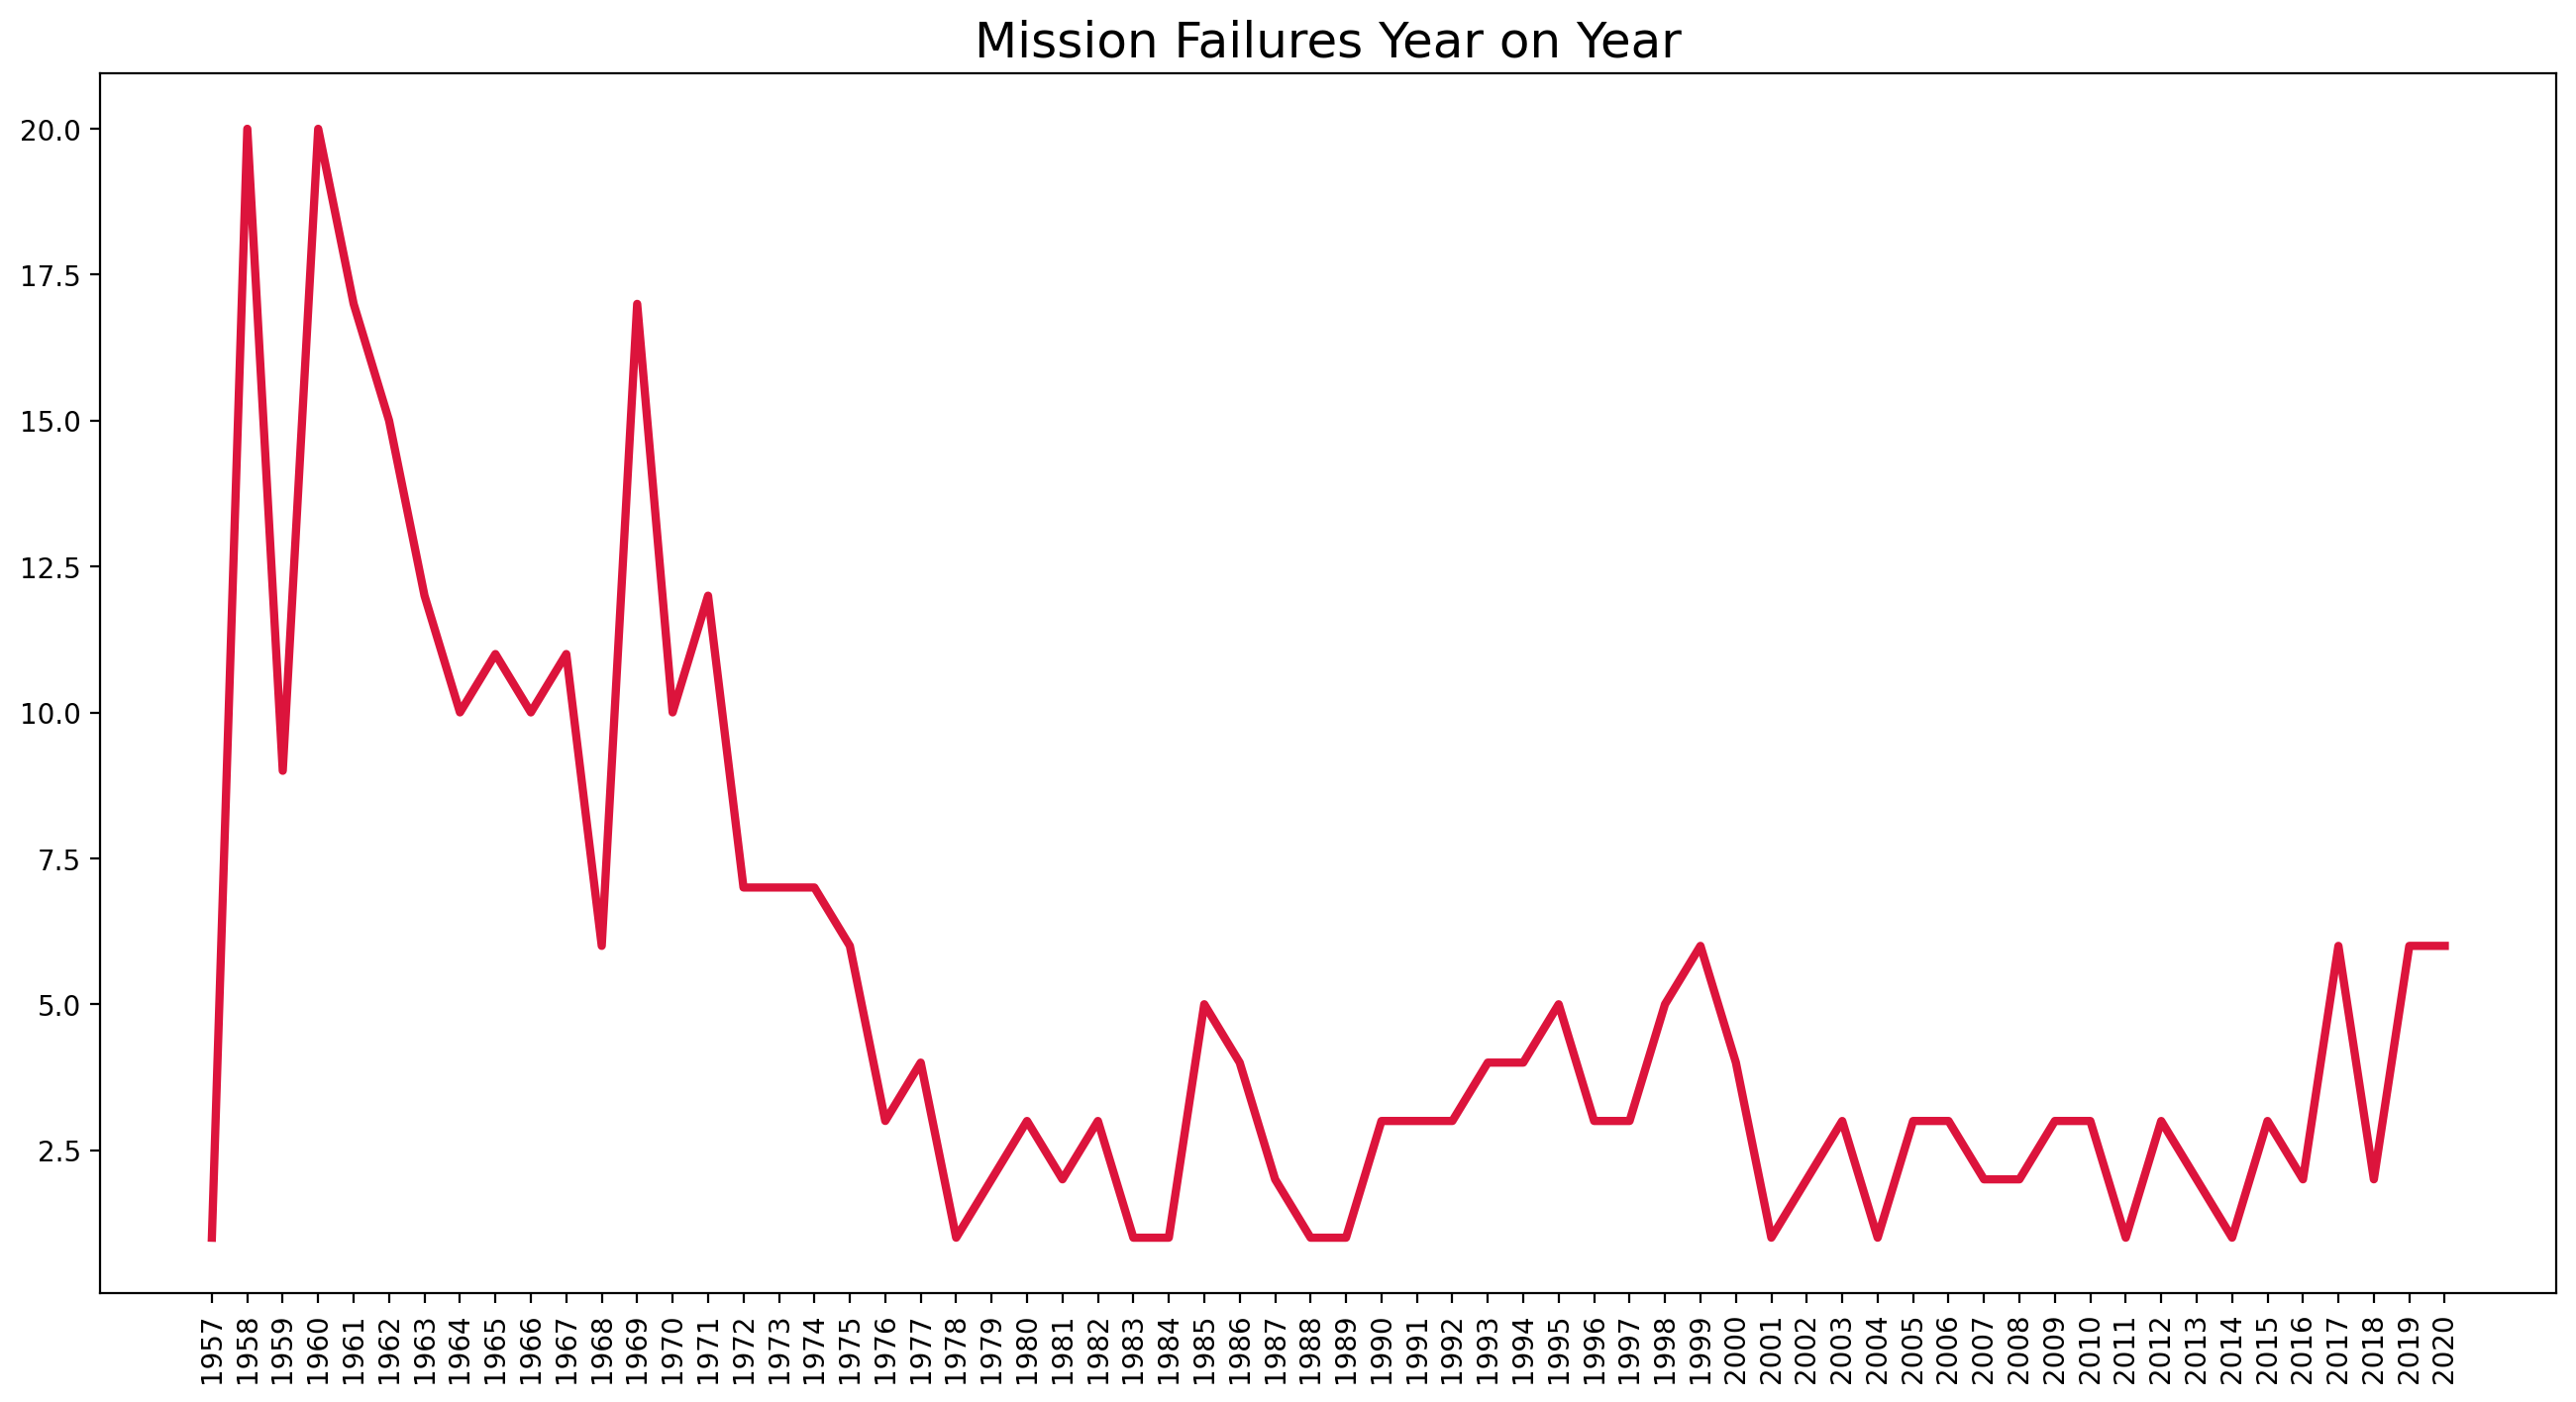

In [477]:
plt.figure(figsize=(16,8), dpi=200)
plt.title('Mission Failures Year on Year', fontsize=18)

ax1 = plt.gca()

ax1.plot(mission_failures_per_year['Date'], mission_failures_per_year['Failures'], linewidth=3, c='crimson')
plt.xticks(mission_failures_per_year["Date"], rotation=90)
plt.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

In [514]:
prct_failures = df_data.groupby([df_data['Date'].dt.year, 'Mission_Status'])['Mission_Status'].agg(['count']).reset_index()
prct_failures = prct_failures.query("Mission_Status == 'Failure'")
new_prct_failures = pd.merge(prct_failures,launches_per_year,on='Date')
new_prct_failures.rename(columns={'count_x':'Failures','count_y':'Total_Launches'}, inplace=True)


In [515]:
new_prct_failures

,Date,Mission_Status,Failures,Total_Launches
0,1957,Failure,1,3
1,1958,Failure,20,28
2,1959,Failure,9,20
3,1960,Failure,20,39
4,1961,Failure,17,52
...,...,...,...,...
59,2016,Failure,2,90
60,2017,Failure,6,92
61,2018,Failure,2,117
62,2019,Failure,6,109


In [517]:
new_prct_failures['Failure Percentage'] = new_prct_failures['Failures']/new_prct_failures['Total_Launches']*100
new_prct_failures

,Date,Mission_Status,Failures,Total_Launches,Failure Percentage
0,1957,Failure,1,3,33.33
1,1958,Failure,20,28,71.43
2,1959,Failure,9,20,45.00
3,1960,Failure,20,39,51.28
4,1961,Failure,17,52,32.69
...,...,...,...,...,...
59,2016,Failure,2,90,2.22
60,2017,Failure,6,92,6.52
61,2018,Failure,2,117,1.71
62,2019,Failure,6,109,5.50


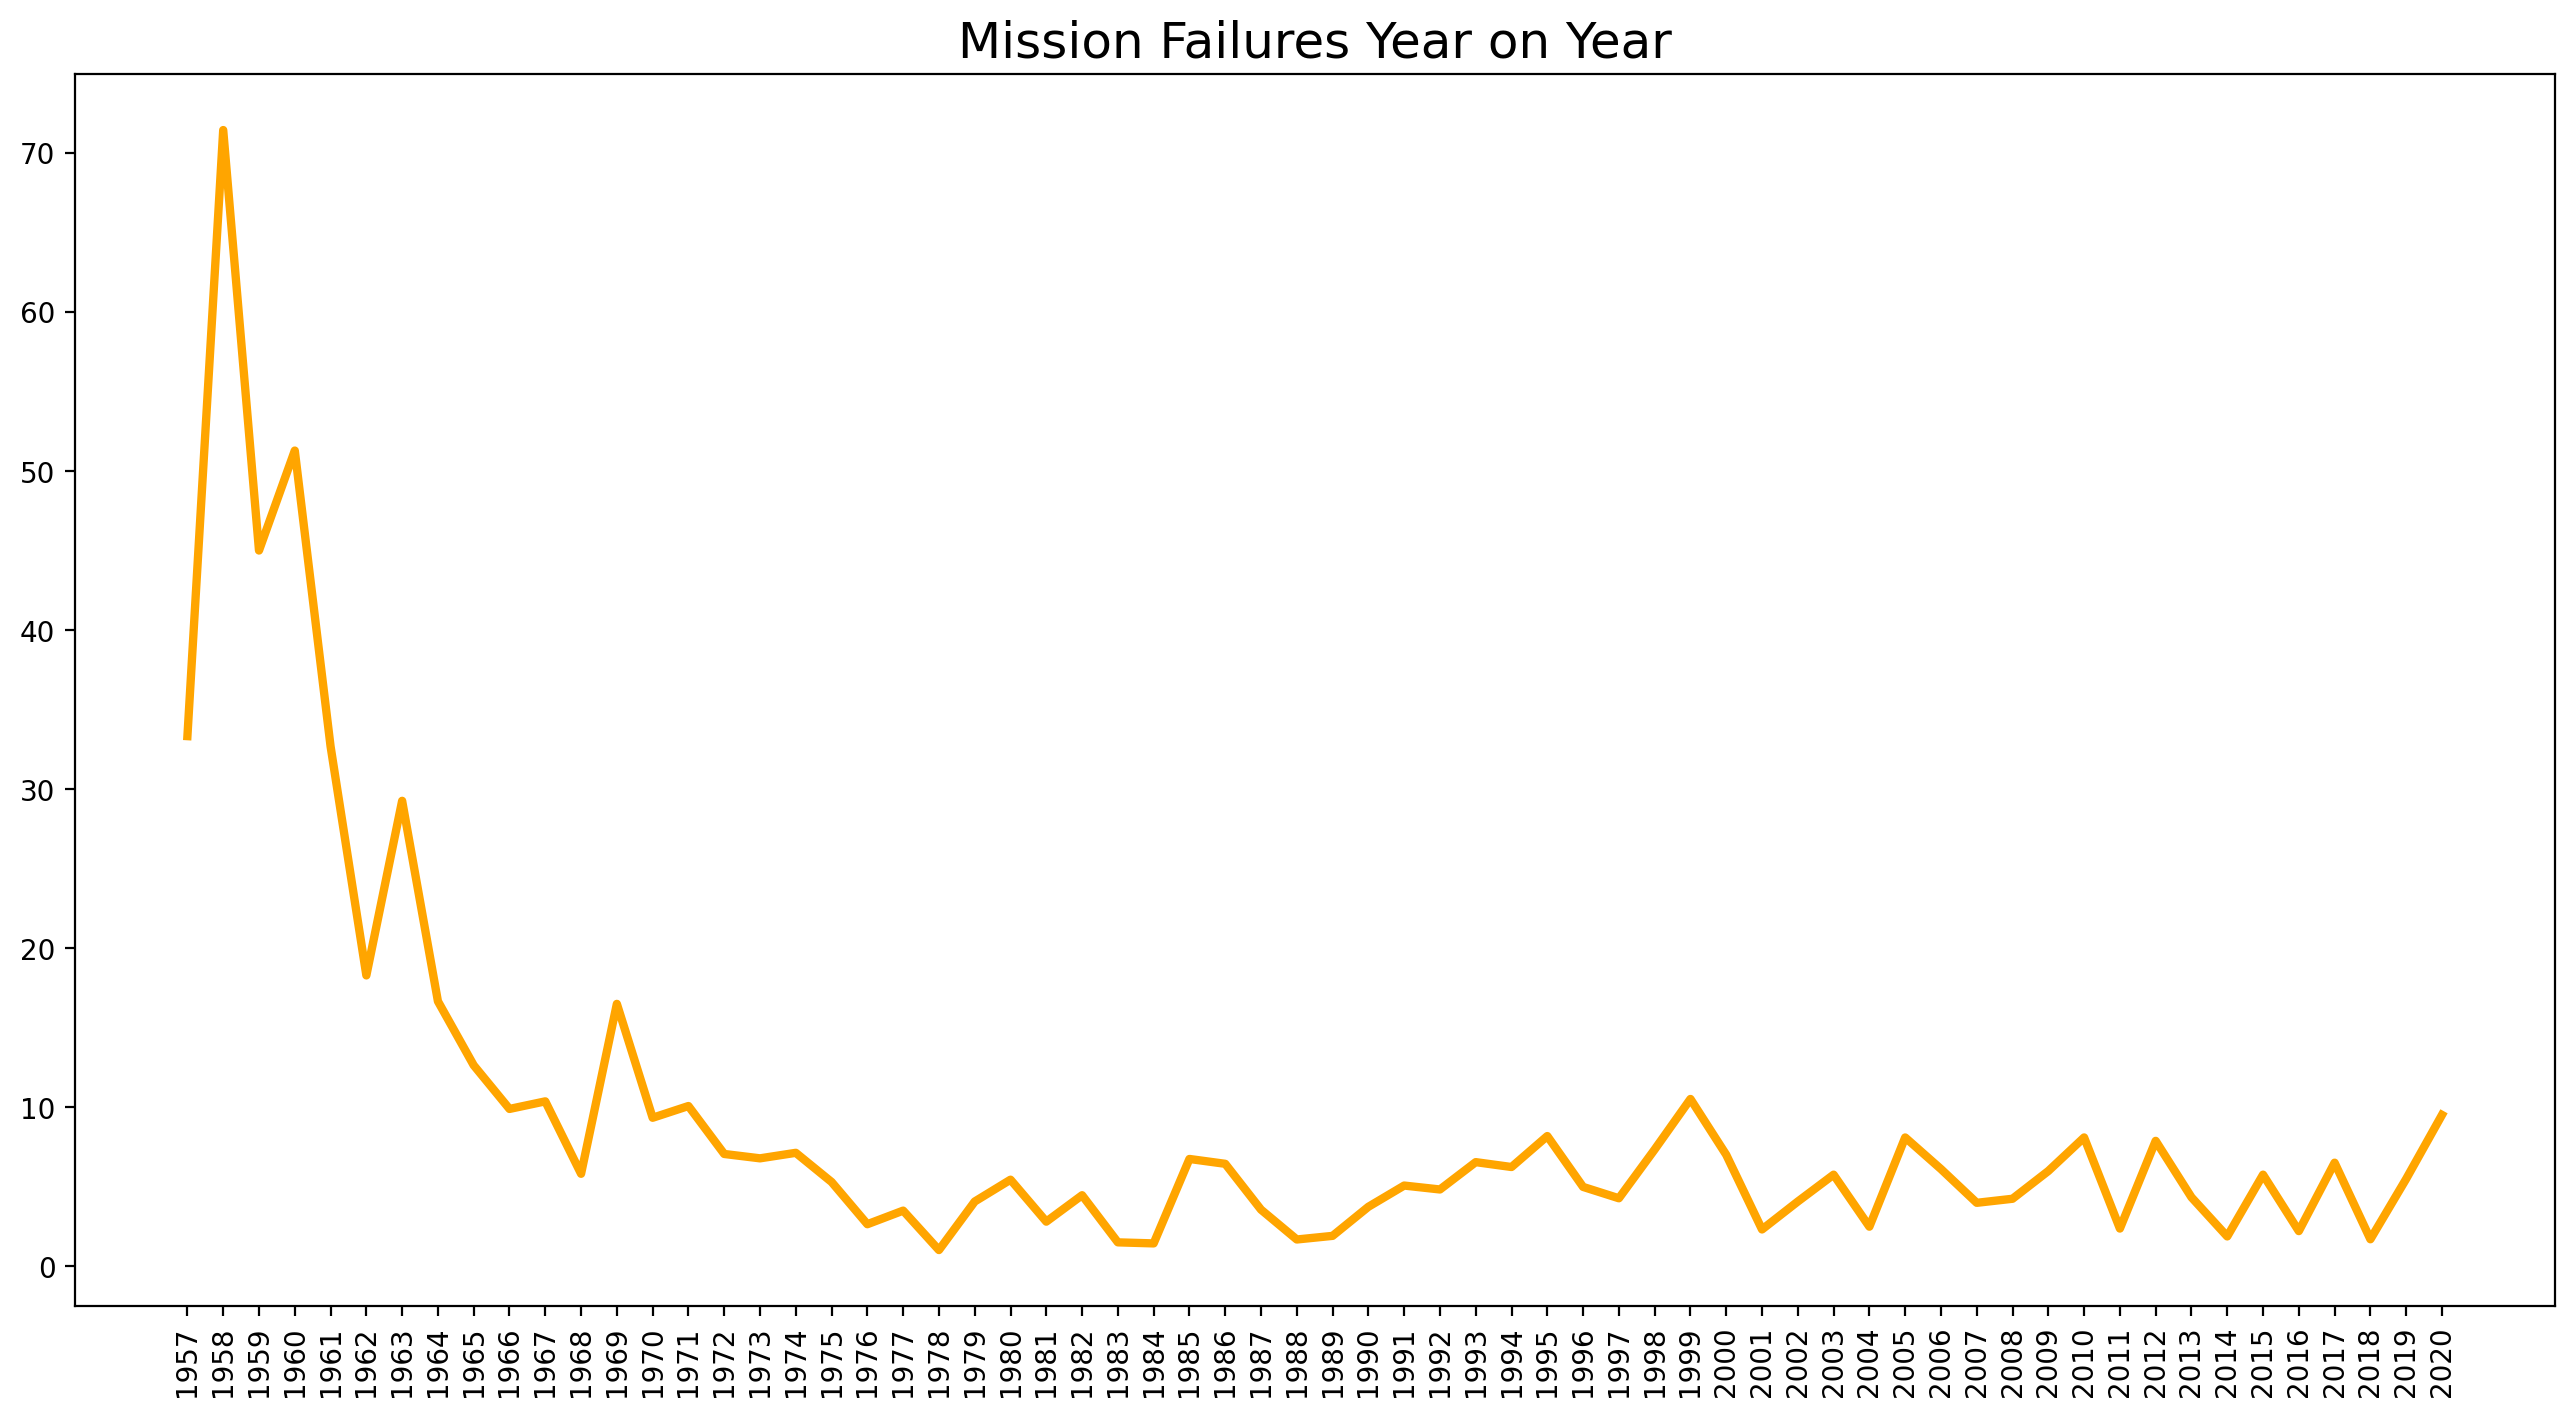

In [520]:
plt.figure(figsize=(16,8), dpi=200)
plt.title('Mission Failures Year on Year', fontsize=18)

ax1 = plt.gca()

ax1.plot(new_prct_failures['Date'], new_prct_failures['Failure Percentage'], linewidth=3, c='orange')
plt.xticks(new_prct_failures["Date"], rotation=90)
plt.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

In [522]:
countries_launches_per_year = df_data.copy()[["ISO_CODE", "Date"]]
countries_launches_per_year["Date"] = countries_launches_per_year["Date"].dt.year

countries_launches_per_year

,ISO_CODE,Date
0,USA,2020
1,CHN,2020
2,USA,2020
3,KAZ,2020
4,USA,2020
...,...,...
4319,USA,1958
4320,USA,1958
4321,USA,1957
4322,KAZ,1957


In [524]:
countries_launches_per_year = countries_launches_per_year.groupby(["ISO_CODE", "Date"]).agg(Total_Launches=("ISO_CODE", "count")).reset_index()

countries_launches_per_year

,ISO_CODE,Date,Total_Launches
0,AUS,1967,1
1,AUS,1968,1
2,AUS,1969,1
3,AUS,1970,2
4,AUS,1971,1
...,...,...,...
422,USA,2016,27
423,USA,2017,30
424,USA,2018,34
425,USA,2019,27


In [526]:
plt.figure(figsize=(16,8), dpi=200)

line = px.line(countries_launches_per_year,
                  x='Date',
                  y='Total_Launches',
                  color='ISO_CODE',
                  hover_name = 'ISO_CODE'
                  )

line.update_layout(xaxis_title='Year',
                   yaxis_title='Number of Launches',
                   title = 'Launches per Year by Countries')



line.show()

<Figure size 3200x1600 with 0 Axes>

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

In [531]:
org_launches_per_year = df_data
org_launches_per_year = org_launches_per_year.groupby([org_launches_per_year['Date'].dt.year, 'Organisation'])['Mission_Status'].agg(['count']).reset_index()
org_launches_per_year

,Date,Organisation,count
0,1957,RVSN USSR,2
1,1957,US Navy,1
2,1958,AMBA,7
3,1958,NASA,2
4,1958,RVSN USSR,5
...,...,...,...
658,2020,Roscosmos,4
659,2020,SpaceX,14
660,2020,ULA,4
661,2020,VKS RF,3


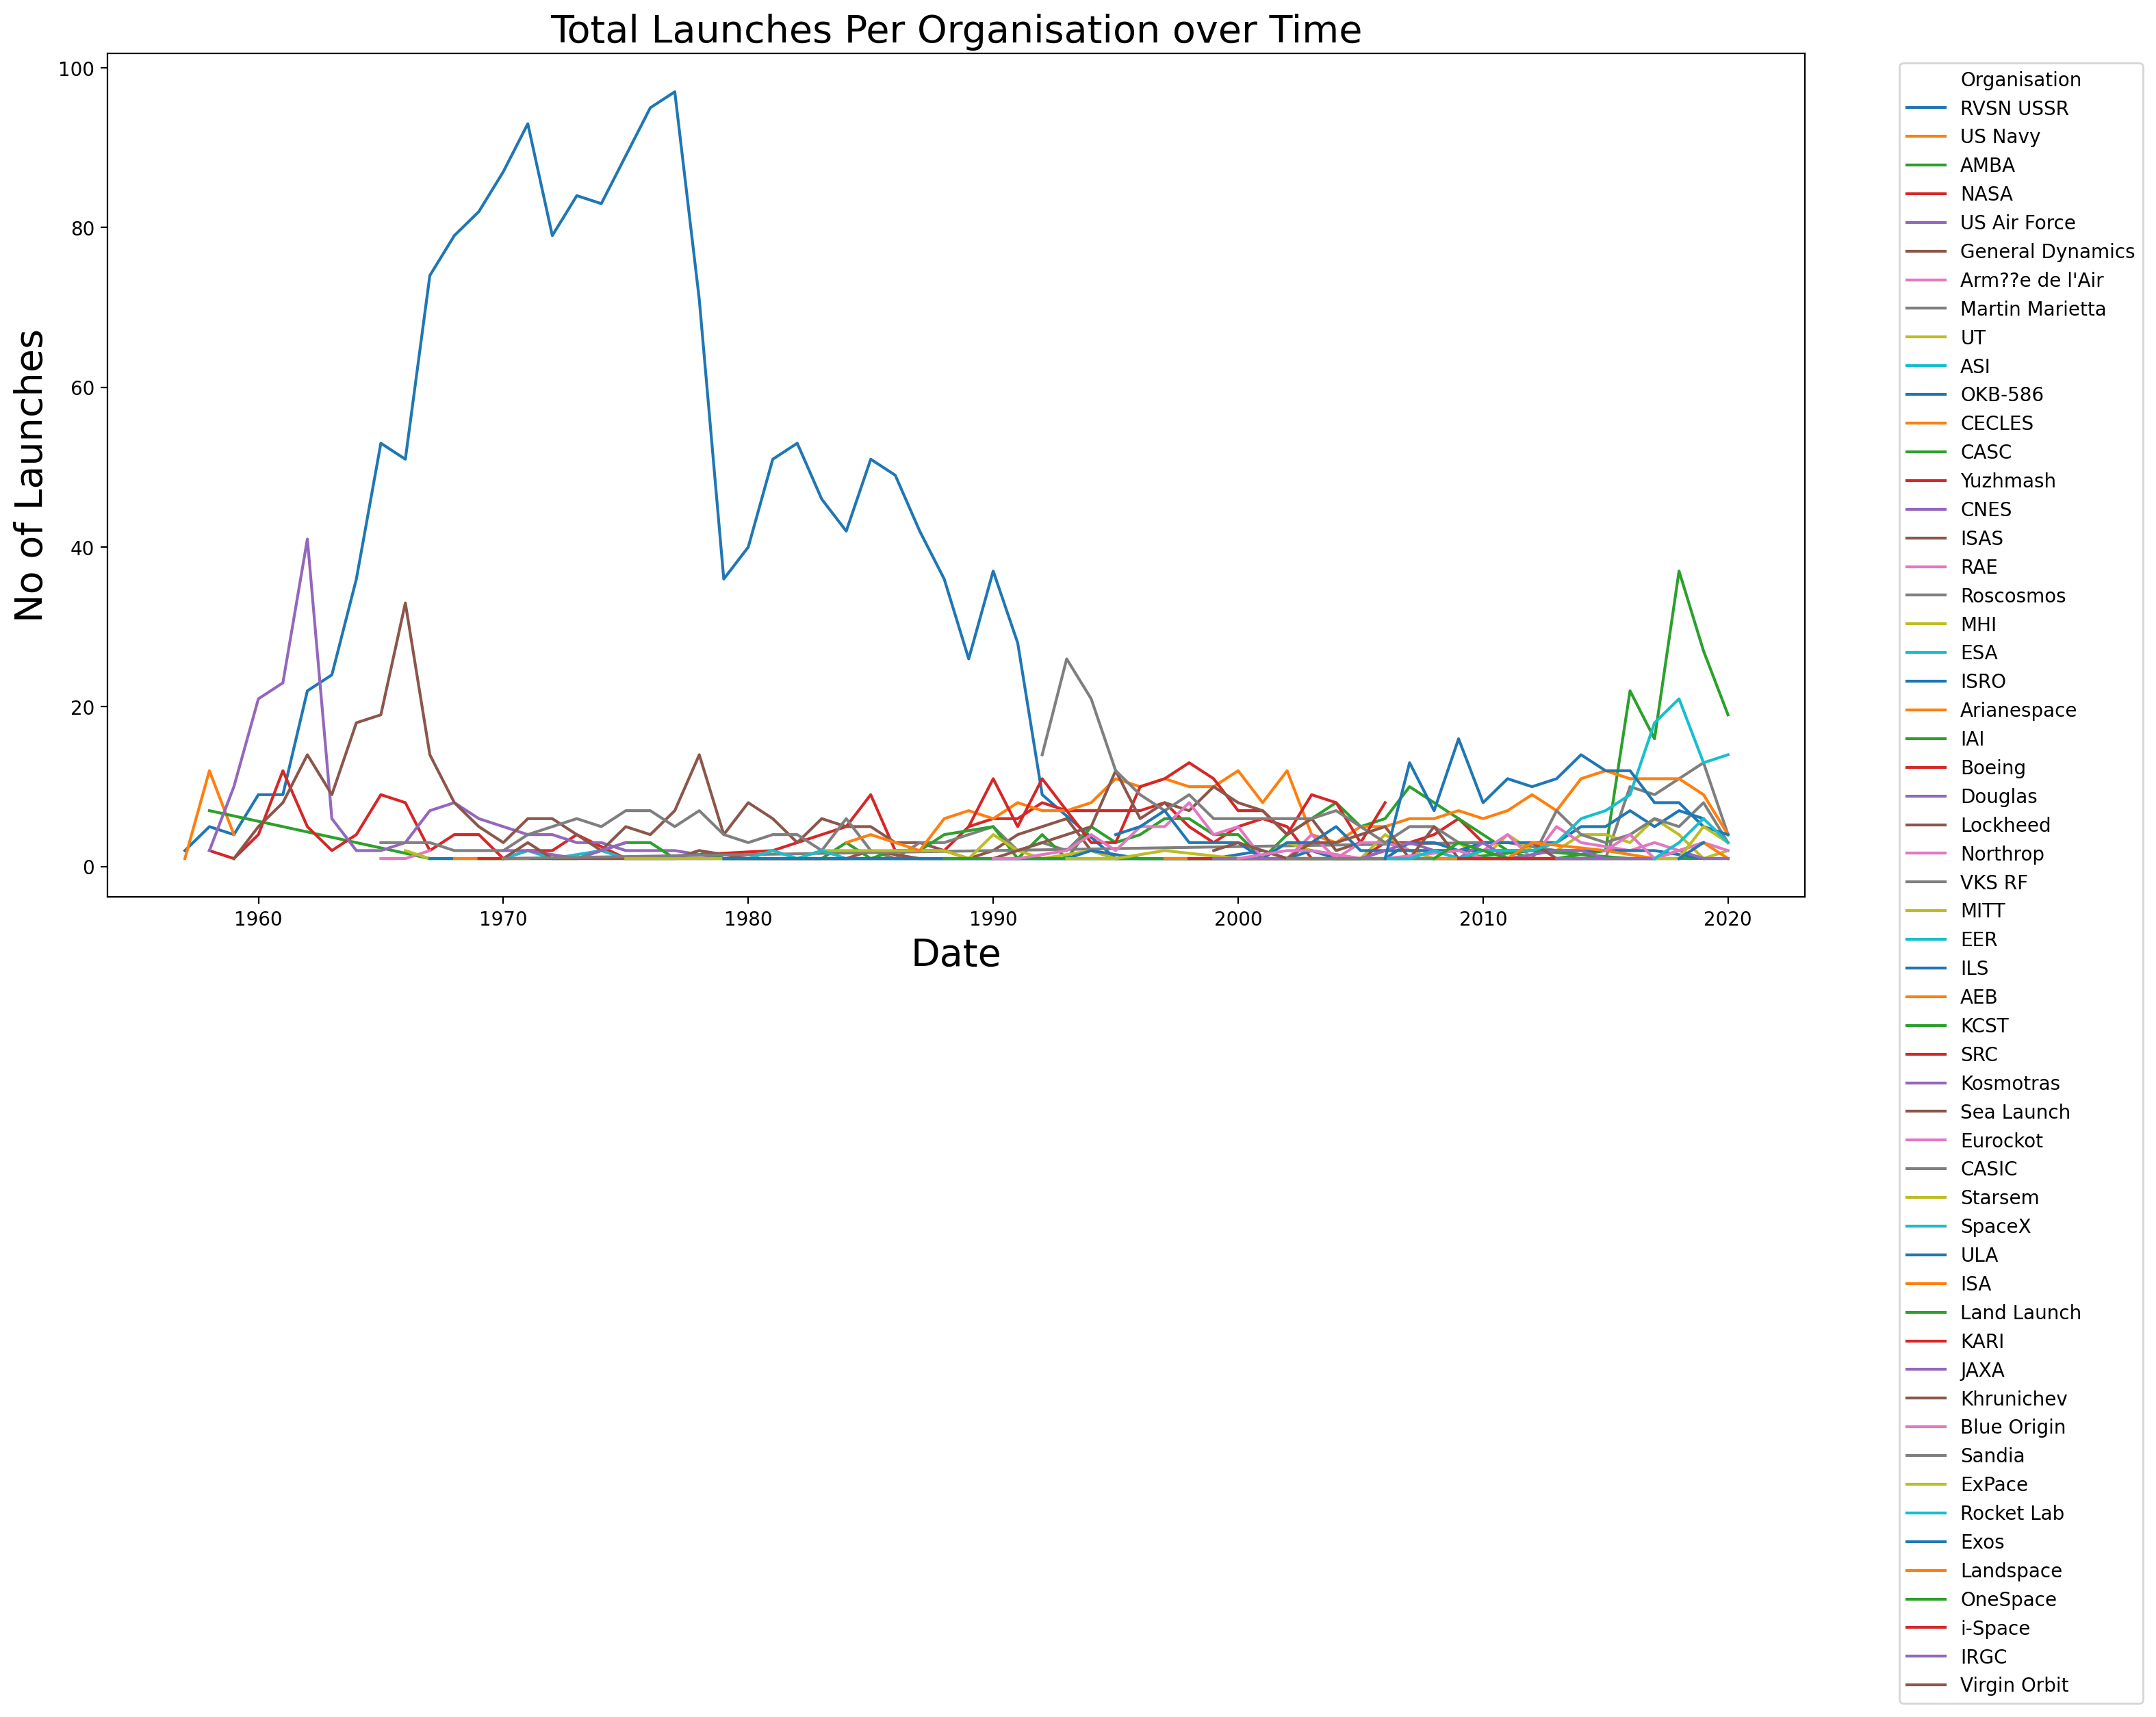

In [534]:
plt.figure(figsize=(16, 8), dpi=200)

plt.title('Total Launches Per Organisation over Time', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('No of Launches', fontsize=20)

for org in org_launches_per_year['Organisation'].unique():
    org_data = org_launches_per_year[org_launches_per_year["Organisation"] == org]
    plt.plot(org_data['Date'], org_data['count'])

plt.legend(org_launches_per_year["Organisation"].unique(), title='Organisation', bbox_to_anchor=(1.05, 1))

plt.show()